In [24]:
### I want to generate histograms with a mask in radius

In [25]:
# Imports
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os
import statistics as pystats

import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
#from astropy.io import fits
import matplotlib as mpl

from deproject import deproject, get_galaxy_specs

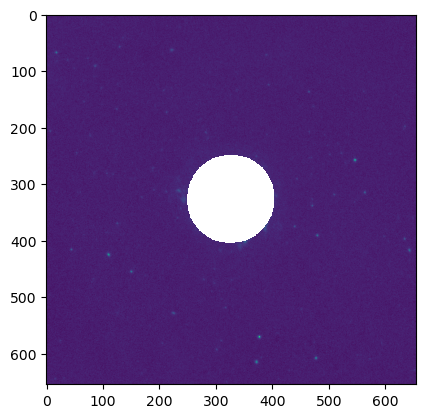

In [26]:
dir = '/Users/michaelhill/Downloads/raw_background_comps/' # directory containing folders containing galaxy fit files
galaxy = 'ngc0628' # name of folder to look in (I actually have all my galaxy files in same folder, see his original for how to do it that way)

mask_parameter = 10*1e3


###
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy.upper()) # DIST [Mpc]
hdu_galx = fits.open(dir + galaxy + '_w1_mjysr.fits')[0]
deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6)

mask = (r_pc < mask_parameter)
w1 = hdu_galx.data
w1[mask] = np.nan
w1_for_statistics = w1[~mask] # needed later for statistic calculations
w1_for_statistics.flatten()
w1 = w1.flatten()
###


###
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy.upper()) # DIST [Mpc]
hdu_galx = fits.open(dir + galaxy + '_w2_mjysr.fits')[0]
deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6)

mask = (r_pc < mask_parameter)
w2 = hdu_galx.data
w2[mask] = np.nan
w2_for_statistics = w2[~mask] # needed later for statistic calculations
w2_for_statistics.flatten()
w2 = w2.flatten()
###


###
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy.upper()) # DIST [Mpc]
hdu_galx = fits.open(dir + galaxy + '_w3_mjysr.fits')[0]
deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6)

mask = (r_pc < mask_parameter)
w3 = hdu_galx.data
w3[mask] = np.nan
plt.imshow(w3) # just to show what our radial mask looks like
w3_for_statistics = w3[~mask] # needed later for statistic calculations
w3_for_statistics.flatten()
w3 = w3.flatten()
###


###
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy.upper()) # DIST [Mpc]
hdu_galx = fits.open(dir + galaxy + '_w4_mjysr.fits')[0]
deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6)

mask = (r_pc < mask_parameter)
w4 = hdu_galx.data
w4[mask] = np.nan
w4_for_statistics = w4[~mask] # needed later for statistic calculations
w4_for_statistics.flatten()
w4 = w4.flatten()
###

## If we weren't generating scatter plots wouldn't need "w1" at all, only "w1_for_statistics" which can be used for both histograms and statistcs but can't be used for scatter plots since both inputs must be same size for those ##


Mean of w1: 0.015938949491369512

Median of w1: 0.0022458032557413367

Mode of w1: 0.012356272313821734

Mean of w2: 0.008707148058127945

Median of w2: 0.0017832407857800625

Mode of w2: 0.008790905720584682

Mean of w3: 0.0027501897160337884

Median of w3: 0.0009371603359414661

Mode of w3: 0.04692402955745396

Mean of w4: 0.0024804675545640523

Median of w4: 0.0005874870367898881

Mode of w4: -0.1547017033175182


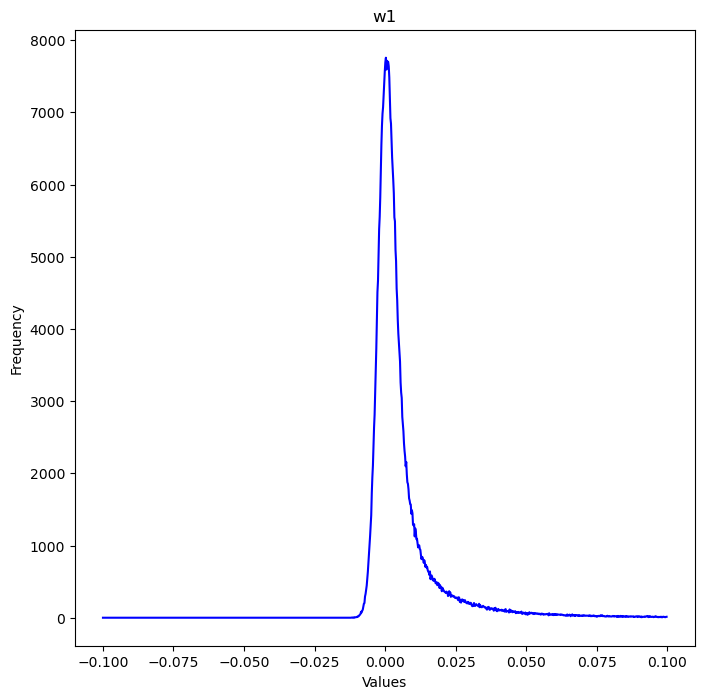

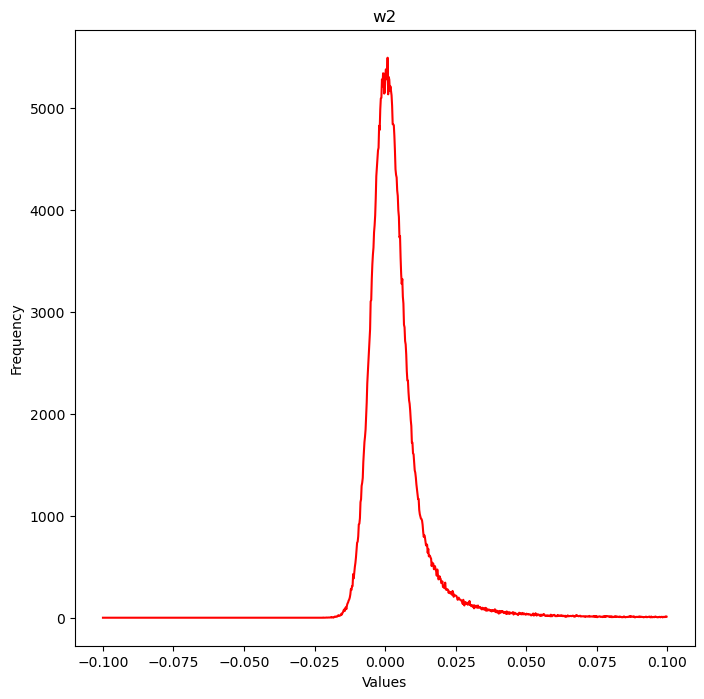

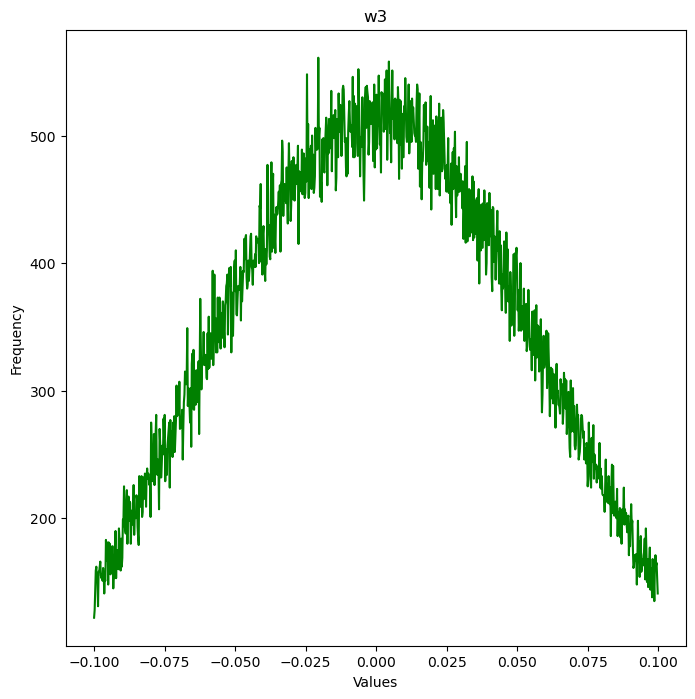

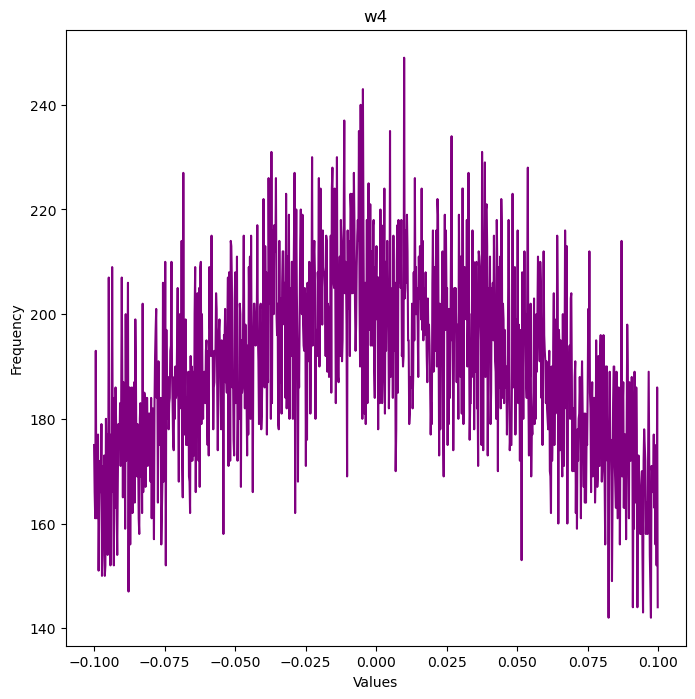

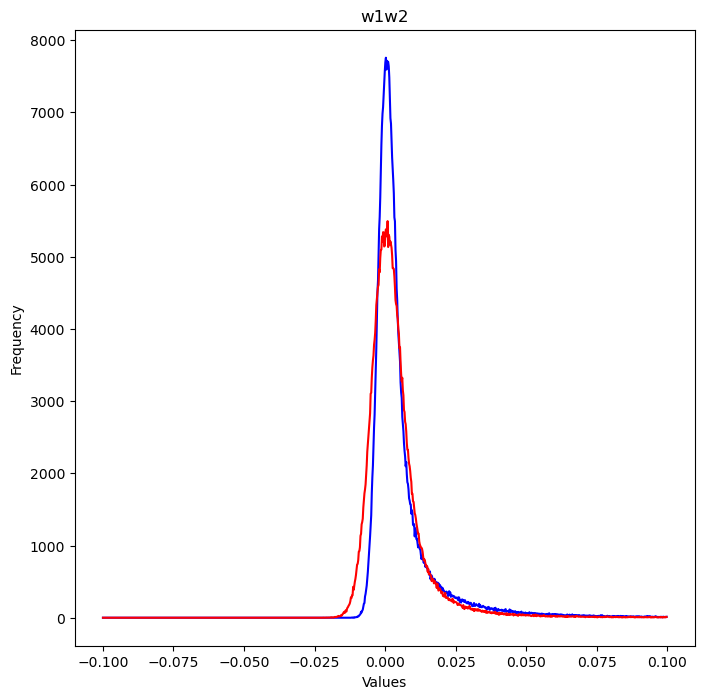

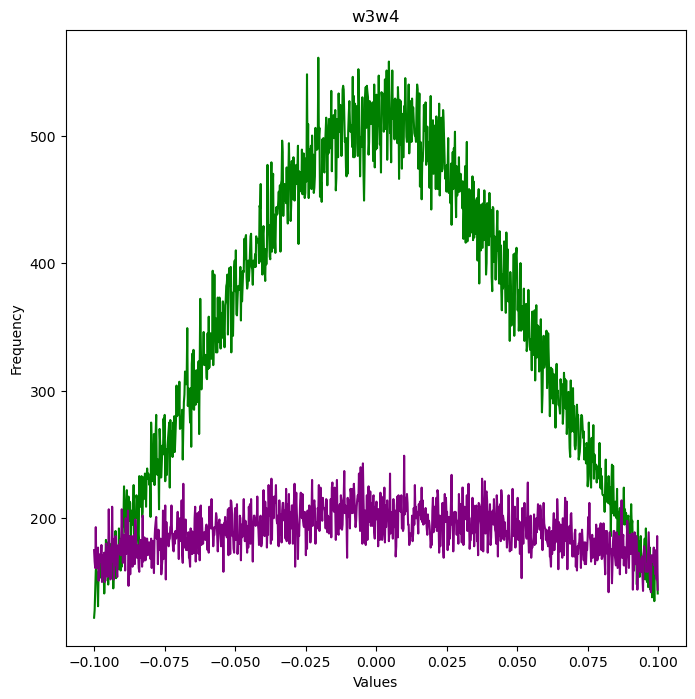

In [27]:
# vars to edit
saveFigs = False
saveStats = False # save histograms stats like mean, median, mode
saveDir = '/Users/michaelhill/Desktop/PHANGS/' + galaxy # different than his original because my files aren't the same folder which I'm saving to
color_w1 = 'blue'
color_w2 = 'red'
color_w3 = 'green'
color_w4 =  'purple'
minclip = -.1
maxclip = .1
bincount = 1000
figx = 8 # apparently, figsize is given inches, whatever that means
figy = 8
xlabel = 'Values'
ylabel = 'Frequency' # of those values

# You should not have to change anything past this point to get the script working correctly

# make directory to store figs if it doesn't exist
if (saveFigs or saveStats):
    if (not os.path.isdir(saveDir + '/figs/')):
        os.mkdir(saveDir + '/figs/')

# open/create text file to store histogram statistics
if (saveStats == True):
    if (not os.path.isfile(saveDir + '/figs/stats.txt')):
        statsFile = open(saveDir + '/figs/stats.txt', 'x')
    else:
        statsFile = open(saveDir + '/figs/stats.txt', 'a')
        
# function to save figs
def saveFig(wise):
    plt.savefig(saveDir + '/figs/' + wise + '.png')   
       
# function to calculate mean, median, mode and print to file
def calcMMM(wdata, wise): # I think this could just have one argument since wise is wdata converted to string?
    mean = pystats.mean(wdata)
    meanString = "\nMean of " + wise + ": " + str(mean)
    print(meanString)
    median = pystats.median(wdata)
    medianString = "\nMedian of " + wise + ": " + str(median)
    print(medianString)
    mode = pystats.mode(wdata)
    modeString = "\nMode of " + wise + ": " + str(mode)
    print(modeString)
    if (saveStats == True):
        statsFile.write(meanString)
        statsFile.write(medianString)
        statsFile.write(modeString)
        statsFile.write('\n')

def createFig1(data, figx, figy, xlabel, ylabel, bins, color, wise):
    f = plt.figure(figsize=(figx, figy))
    Y, BE = np.histogram(data, bins=bins) # returns frequencies of each intensity to Y, each intensity to BE (but BE has length bincount and Y has length bincount-1, I guess because BE includes endpoint but Y is associating frequency with the starting intensity for each interval, so nothing associated with endpoint intensity for Y)
    X = BE[:-1] # need to remove last row to have X and Y be equal lengths
    plt.plot(X, Y, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(wise)
    if (saveFigs == True):
        saveFig(wise)

def createFig2(data1, data2, figx, figy, xlabel, ylabel, bins, color1, color2, wise):
    f = plt.figure(figsize=(figx, figy))
    Y_1, BE_1 = np.histogram(data1, bins=bins)
    Y_2, BE_2 = np.histogram(data2, bins=bins)
    X_1 = BE_1[:-1]
    X_2 = BE_2[:-1]
    plt.plot(X_1, Y_1, color=color1)
    plt.plot(X_2, Y_2, color=color2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(wise)
    if (saveFigs == True):
        saveFig(wise)

# all figures use same bin count, setting it here to be constant
bins=np.linspace(minclip, maxclip, bincount)

# making histograms, figures
# w1
createFig1(w1, figx, figy, xlabel, ylabel, bins, color_w1, "w1")
# Calculate mean, median, mode, and save the figure
calcMMM(w1_for_statistics, 'w1')

# w2
createFig1(w2, figx, figy, xlabel, ylabel, bins, color_w2, "w2")
calcMMM(w2_for_statistics, 'w2')

# w3
createFig1(w3, figx, figy, xlabel, ylabel, bins, color_w3, "w3")
calcMMM(w3_for_statistics, 'w3')

# w4
createFig1(w4, figx, figy, xlabel, ylabel, bins, color_w4, "w4")
calcMMM(w4_for_statistics, 'w4')

# Plotting W1 against W2
createFig2(w1, w2, figx, figy, xlabel, ylabel, bins, color_w1, color_w2, "w1w2")

# Plotting W3 against W4
createFig2(w3, w4, figx, figy, xlabel, ylabel, bins, color_w3, color_w4, "w3w4")

if (saveStats == True):
    statsFile.close()
    
# what's the point in doing all the extra shit to generate histograms instead of just using plt.hist? I think it may be that this is much quicker (kind of like how they recommend plotting pre-computed histogram using stairs)
# maybe I should just move files to PHANGS folder so that I can revert file paths to his original

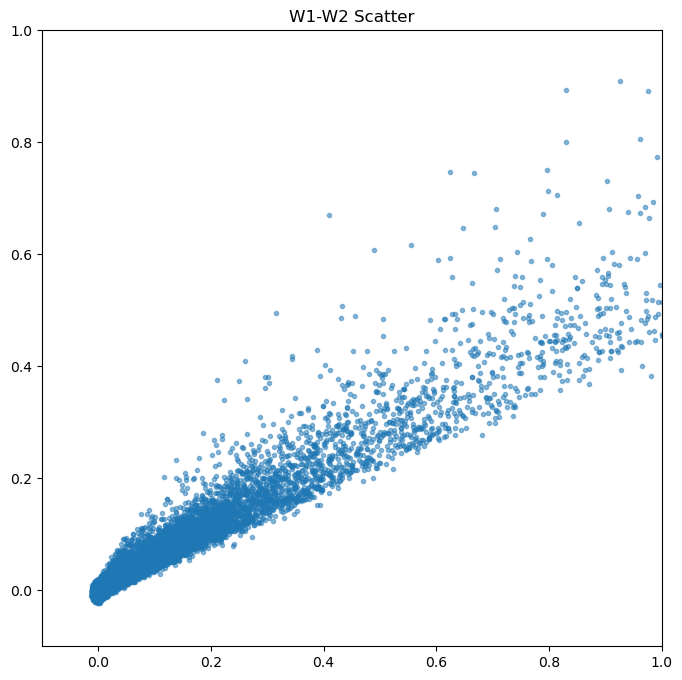

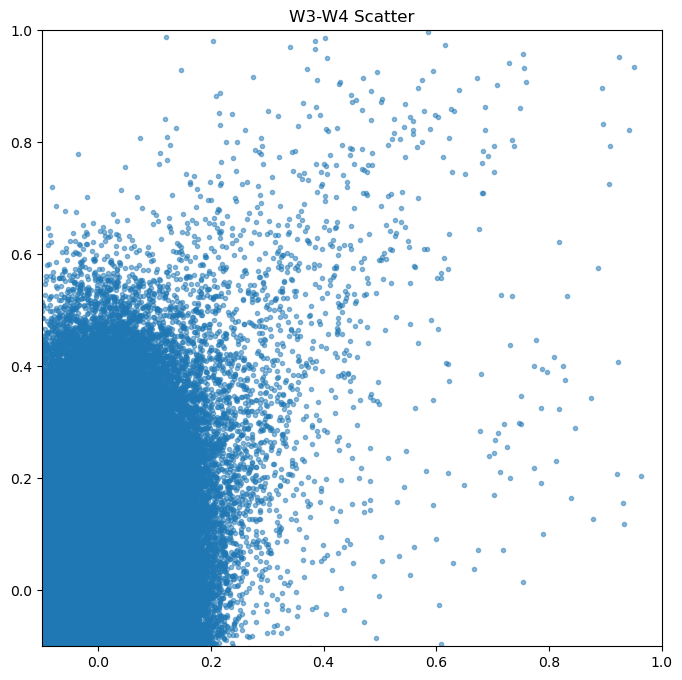

In [28]:
# Plotting w1 against w2
fw12comp = plt.figure(figsize=(figx, figy))
plt.xlim(minclip)
plt.ylim(minclip)
plt.scatter(w1, w2, alpha = 0.5, marker='.')
plt.title('W1-W2 Scatter')
if (saveFigs == True):
    saveFig('w1w2comp')

# Plotting w3 against w4
fw34comp = plt.figure(figsize=(figx, figy))
plt.xlim(minclip)
plt.ylim(minclip)
plt.scatter(w3, w4, alpha = 0.5, marker='.')
plt.title('W3-W4 Scatter')
if (saveFigs == True):
        saveFig('w3w4comp')

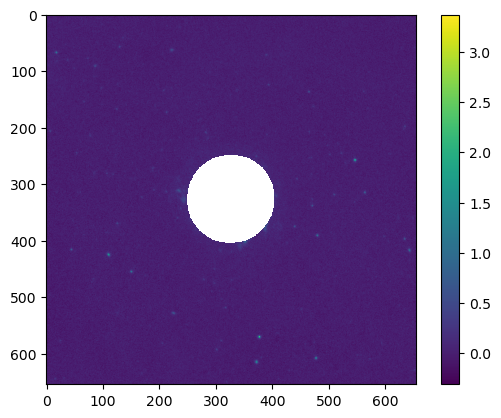

In [29]:
### the normal procedure for generating image ###

# I want to generate histograms with a mask in Radius: only display R < 10000 pc

image_data = fits.getdata('/Users/michaelhill/Downloads/raw_background_comps/ngc0628_w3_mjysr.fits')
mask = (r_pc > 10*1e3)
masked = image_data.copy()
masked[~mask] = np.nan
plt.imshow(masked)
plt.colorbar()